In [1]:
import re #re is Regular Expression
import pandas as pd

In [2]:
f = open('WhatsApp Chat with SST Research Crew Team.txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

11/09/2022, 15:01 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
11/09/2022, 14:49 - Charitha IETE created group "SST Research Crew Team"
11/09/2022, 14:49 - Charitha IETE added you
11/09/2022, 14:49 - You're now an admin
11/09/2022, 14:49 - Charitha IETE changed this group's icon
11/09/2022, 15:42 - Maneesh: Hello everyone
I'm Maneesh.B Director of SST,First of all Congrats to all the members hope we will doing a great work ahead.
Thank you
17/09/2022, 21:05 - Chary: Hllo everyone 
Those who not attended today's meet..
Mail the reason to chair person.
jahnavimahadasi27@gmail.com


Regards|Deputy director SST
Sunny krishna
17/09/2022, 21:11 - Maneesh: Acknowledgement required
17/09/2022, 21:12 - BALARAMA KRISHNA SST Coordinator: Acknowledged
17/09/2022, 21:16 - Sindhuja Research Crew: Acknowledged
17/09/2022, 22:24 - Maneesh: Good eveing everyone

We will be having a meet tomorrow at 7pm shar

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Charitha IETE created group "SST Research Crew Team"\n',
 'Charitha IETE added you\n',
 "You're now an admin\n",
 "Charitha IETE changed this group's icon\n",
 "Maneesh: Hello everyone\nI'm Maneesh.B Director of SST,First of all Congrats to all the members hope we will doing a great work ahead.\nThank you\n",
 "Chary: Hllo everyone \nThose who not attended today's meet..\nMail the reason to chair person.\njahnavimahadasi27@gmail.com\n\n\nRegards|Deputy director SST\nSunny krishna\n",
 'Maneesh: Acknowledgement required\n',
 'BALARAMA KRISHNA SST Coordinator: Acknowledged\n',
 'Sindhuja Research Crew: Acknowledged\n',
 'Maneesh: Good eveing everyone\n\nWe will be having a meet tomorrow at 7pm sharp as we have to start the work so you will be having some tasks and you must complete it.So everyone presence is mandatory.\n\nLink will be shared 

In [7]:
dates = re.findall(pattern,data)
dates

['11/09/2022, 15:01 - ',
 '11/09/2022, 14:49 - ',
 '11/09/2022, 14:49 - ',
 '11/09/2022, 14:49 - ',
 '11/09/2022, 14:49 - ',
 '11/09/2022, 15:42 - ',
 '17/09/2022, 21:05 - ',
 '17/09/2022, 21:11 - ',
 '17/09/2022, 21:12 - ',
 '17/09/2022, 21:16 - ',
 '17/09/2022, 22:24 - ',
 '17/09/2022, 22:26 - ',
 '17/09/2022, 22:40 - ',
 '18/09/2022, 18:46 - ',
 '18/09/2022, 19:03 - ',
 '18/09/2022, 19:53 - ',
 '18/09/2022, 19:57 - ',
 '18/09/2022, 19:57 - ',
 '18/09/2022, 19:57 - ',
 '18/09/2022, 19:57 - ',
 '18/09/2022, 19:58 - ',
 '18/09/2022, 19:58 - ',
 '18/09/2022, 19:58 - ',
 '18/09/2022, 19:58 - ',
 '18/09/2022, 19:58 - ',
 '18/09/2022, 20:01 - ',
 '18/09/2022, 20:01 - ',
 '18/09/2022, 20:02 - ',
 '18/09/2022, 20:10 - ',
 '19/09/2022, 21:20 - ',
 '19/09/2022, 21:22 - ',
 '19/09/2022, 21:24 - ',
 '19/09/2022, 21:36 - ',
 '26/09/2022, 14:19 - ',
 '26/09/2022, 14:24 - ',
 '26/09/2022, 18:23 - ',
 '26/09/2022, 18:50 - ',
 '09/10/2022, 17:45 - ',
 '10/10/2022, 14:30 - ',
 '10/10/2022, 14:36 - ',


In [8]:
df = pd.DataFrame({'user_message': messages,'date': dates})
df['date'] = pd.to_datetime(df['date'],format = '%d/%m/%Y, %H:%M - ') #converting into datetime
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-09-11 15:01:00
1,"Charitha IETE created group ""SST Research Crew...",2022-09-11 14:49:00
2,Charitha IETE added you\n,2022-09-11 14:49:00
3,You're now an admin\n,2022-09-11 14:49:00
4,Charitha IETE changed this group's icon\n,2022-09-11 14:49:00


In [9]:
df.shape

(1277, 2)

In [10]:
#seperating user name and message

users = []
messages=[]
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['users'] = users
df['messages'] = messages
df.drop(columns=['user_message'],inplace=True)

df.head()

,date,users,messages
0,2022-09-11 15:01:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-09-11 14:49:00,group_notification,"Charitha IETE created group ""SST Research Crew..."
2,2022-09-11 14:49:00,group_notification,Charitha IETE added you\n
3,2022-09-11 14:49:00,group_notification,You're now an admin\n
4,2022-09-11 14:49:00,group_notification,Charitha IETE changed this group's icon\n


In [11]:
df.head(10)

,date,users,messages
0,2022-09-11 15:01:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-09-11 14:49:00,group_notification,"Charitha IETE created group ""SST Research Crew..."
2,2022-09-11 14:49:00,group_notification,Charitha IETE added you\n
3,2022-09-11 14:49:00,group_notification,You're now an admin\n
4,2022-09-11 14:49:00,group_notification,Charitha IETE changed this group's icon\n
5,2022-09-11 15:42:00,Maneesh,"Hello everyone\nI'm Maneesh.B Director of SST,..."
6,2022-09-17 21:05:00,Chary,Hllo everyone \nThose who not attended today's...
7,2022-09-17 21:11:00,Maneesh,Acknowledgement required\n
8,2022-09-17 21:12:00,BALARAMA KRISHNA SST Coordinator,Acknowledged\n
9,2022-09-17 21:16:00,Sindhuja Research Crew,Acknowledged\n


In [12]:
df['year'] = df['date'].dt.year # To extract year

In [13]:
df.head(10)

,date,users,messages,year
0,2022-09-11 15:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-09-11 14:49:00,group_notification,"Charitha IETE created group ""SST Research Crew...",2022
2,2022-09-11 14:49:00,group_notification,Charitha IETE added you\n,2022
3,2022-09-11 14:49:00,group_notification,You're now an admin\n,2022
4,2022-09-11 14:49:00,group_notification,Charitha IETE changed this group's icon\n,2022
5,2022-09-11 15:42:00,Maneesh,"Hello everyone\nI'm Maneesh.B Director of SST,...",2022
6,2022-09-17 21:05:00,Chary,Hllo everyone \nThose who not attended today's...,2022
7,2022-09-17 21:11:00,Maneesh,Acknowledgement required\n,2022
8,2022-09-17 21:12:00,BALARAMA KRISHNA SST Coordinator,Acknowledged\n,2022
9,2022-09-17 21:16:00,Sindhuja Research Crew,Acknowledged\n,2022


In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df['day'] = df['date'].dt.day

In [16]:
df['hours'] = df['date'].dt.hour

In [17]:
df['minute'] = df['date'].dt.minute

In [18]:
df.head()

,date,users,messages,year,month,day,hours,minute
0,2022-09-11 15:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,September,11,15,1
1,2022-09-11 14:49:00,group_notification,"Charitha IETE created group ""SST Research Crew...",2022,September,11,14,49
2,2022-09-11 14:49:00,group_notification,Charitha IETE added you\n,2022,September,11,14,49
3,2022-09-11 14:49:00,group_notification,You're now an admin\n,2022,September,11,14,49
4,2022-09-11 14:49:00,group_notification,Charitha IETE changed this group's icon\n,2022,September,11,14,49


In [19]:
round((df['users'].value_counts()/df.shape[0])*100,2).reset_index()

,users,count
0,Maneesh,32.11
1,Chitra Sst,14.72
2,BALARAMA KRISHNA SST Coordinator,14.25
3,Keeerthi Sst,13.08
4,Amruthvarsh Sst,11.75
5,Sindhuja Research Crew,11.20
6,group_notification,1.80
7,Chary,0.94
8,Charitha IETE,0.08
9,Dharahaas Representative Iete,0.08


In [20]:
temp = df[df['users'] != 'group_notification']
temp = temp[temp['messages'] != '<Media omitted>\n']

In [21]:
f = open('stopwords.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [22]:
#Fetch top 20 most used words
words = []

for message in temp['messages']:
    for word in message.lower().split():
        if word not in stop_words:
            words.extend(message.split())

In [23]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20)) #Used to get the most common words

,0,1
0,the,1740
1,to,1038
2,and,857
3,be,676
4,is,595
5,I,584
6,will,578
7,a,575
8,anna,567
9,you,477


In [24]:
#remove group messages
#remove media omitted messages
#remove stopwords

In [25]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Maneesh\anaconda3\python.exe -m pip install --upgrade pip


In [26]:
import emoji

In [28]:
emojis = []
for message in df['messages']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA['en']])

KeyError: 'en'

In [29]:
df['month_num'] = df['date'].dt.month

In [32]:
timeline = df.groupby(['year','month','month_num']).count()['messages'].reset_index()

In [33]:
timeline

,year,month,month_num,messages
0,2022,December,12,105
1,2022,November,11,272
2,2022,October,10,339
3,2022,September,9,37
4,2023,April,4,12
5,2023,February,2,184
6,2023,January,1,161
7,2023,March,3,164
8,2023,May,5,2
9,2023,October,10,1


In [36]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [37]:
timeline['time'] = time

In [38]:
timeline

,year,month,month_num,messages,time
0,2022,December,12,105,December-2022
1,2022,November,11,272,November-2022
2,2022,October,10,339,October-2022
3,2022,September,9,37,September-2022
4,2023,April,4,12,April-2023
5,2023,February,2,184,February-2023
6,2023,January,1,161,January-2023
7,2023,March,3,164,March-2023
8,2023,May,5,2,May-2023
9,2023,October,10,1,October-2023


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

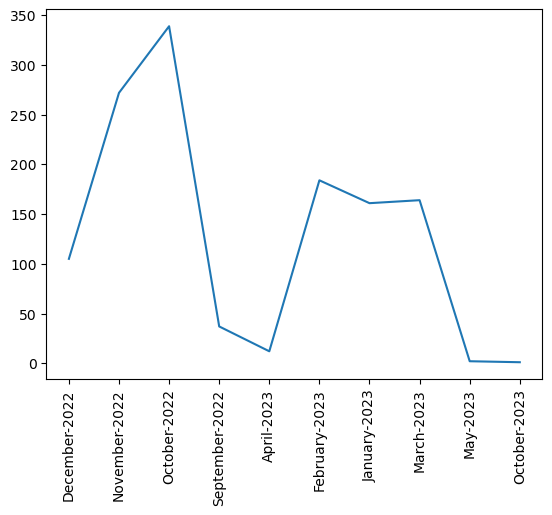

In [43]:
plt.plot(timeline['time'],timeline['messages'])
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
df['only_date'] = df['date'].dt.date

In [50]:
daily_timeline = df.groupby('only_date').c b
ount()['messages'].reset_index()

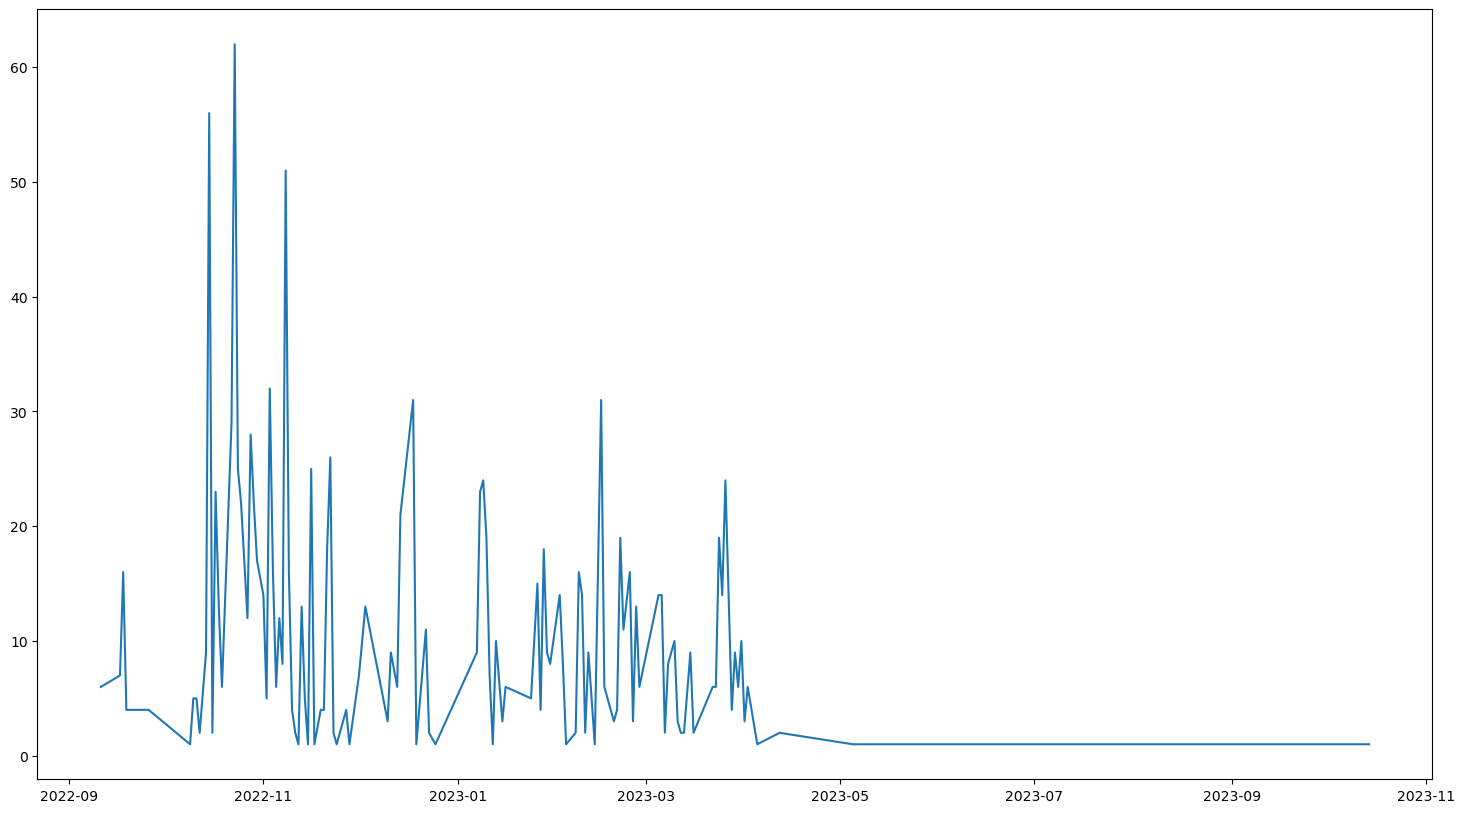

In [53]:
plt.figure(figsize = (18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['messages'])

In [54]:
df.head()

,date,users,messages,year,month,day,hours,minute,month_num,only_date
0,2022-09-11 15:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,September,11,15,1,9,2022-09-11
1,2022-09-11 14:49:00,group_notification,"Charitha IETE created group ""SST Research Crew...",2022,September,11,14,49,9,2022-09-11
2,2022-09-11 14:49:00,group_notification,Charitha IETE added you\n,2022,September,11,14,49,9,2022-09-11
3,2022-09-11 14:49:00,group_notification,You're now an admin\n,2022,September,11,14,49,9,2022-09-11
4,2022-09-11 14:49:00,group_notification,Charitha IETE changed this group's icon\n,2022,September,11,14,49,9,2022-09-11


In [56]:
df['day_name'] = df['date'].dt.day_name()

In [59]:
df['day_name'].value_counts()

day_name
Sunday       280
Saturday     202
Tuesday      189
Wednesday    177
Monday       159
Friday       138
Thursday     132
Name: count, dtype: int64

In [66]:
period = []
for hour in df[['day_name','hours']]['hours']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [67]:
df['period'] = period

In [68]:
df.head()

,date,users,messages,year,month,day,hours,minute,month_num,only_date,day_name,period
0,2022-09-11 15:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,September,11,15,1,9,2022-09-11,Sunday,15-16
1,2022-09-11 14:49:00,group_notification,"Charitha IETE created group ""SST Research Crew...",2022,September,11,14,49,9,2022-09-11,Sunday,14-15
2,2022-09-11 14:49:00,group_notification,Charitha IETE added you\n,2022,September,11,14,49,9,2022-09-11,Sunday,14-15
3,2022-09-11 14:49:00,group_notification,You're now an admin\n,2022,September,11,14,49,9,2022-09-11,Sunday,14-15
4,2022-09-11 14:49:00,group_notification,Charitha IETE changed this group's icon\n,2022,September,11,14,49,9,2022-09-11,Sunday,14-15


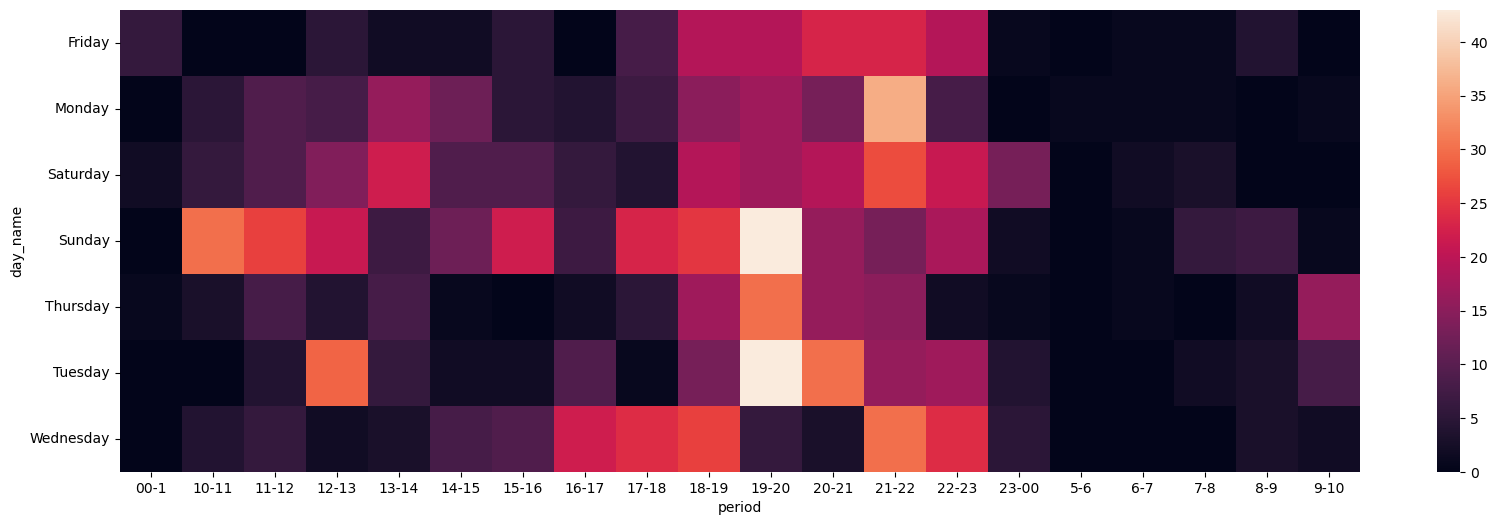

In [70]:
import seaborn as sns
plt.figure(figsize = (20,6))
sns.heatmap(df.pivot_table(index = 'day_name',columns = 'period',values = 'messages',aggfunc = 'count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()
